In [1]:
from keras.models import load_model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Cargar el modelo
loaded_model = load_model('../models/model2-RGB.h5')

In [22]:
loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 98, 98, 64)   1792        ['input_1[0][0]']                
                                                                                                  
 conv2d_34 (Conv2D)             (None, 96, 96, 64)   36928       ['conv2d_1[0][0]']               
                                                                                                  
 max_pooling2d_17 (MaxPooling2D  (None, 48, 48, 64)  0           ['conv2d_34[0][0]']          

In [30]:

df_val = pd.read_csv(r'..\Data\processed\val-processed.csv')

images_val = np.load(
    '../Data/processed/image_array100_val.npy', allow_pickle=True)

In [31]:
X_val = images_val
y_gender_val = df_val['Gender']
y_age_raw_val = df_val['Age']
y_age_val = y_age_raw_val / 80

y_gender_val = np.array(y_gender_val)
y_age_val = np.array(y_age_val)

print('Dimensiones de X:', X_val.shape)
print('Dimensiones de y_gender:', y_gender_val.shape)
print('Dimensiones de y_age:', y_age_val.shape)

Dimensiones de X: (6685, 100, 100, 3)
Dimensiones de y_gender: (6685,)
Dimensiones de y_age: (6685,)


In [24]:
pred = loaded_model.predict(X_val)

y_age_pred = np.round(80*pred[1],2)
y_gender_pred = np.round(pred[0],2)

209/209 [==============================] - 38s 179ms/step


In [23]:
pred = loaded_model.evaluate(X_val, [y_gender_val, y_age_val])

209/209 [==============================] - 37s 177ms/step - loss: 0.4301 - gender_out_loss: 0.2969 - age_out_loss: 0.1332 - gender_out_accuracy: 0.8778 - gender_out_mae: 0.1633 - age_out_accuracy: 0.0033 - age_out_mae: 0.1332


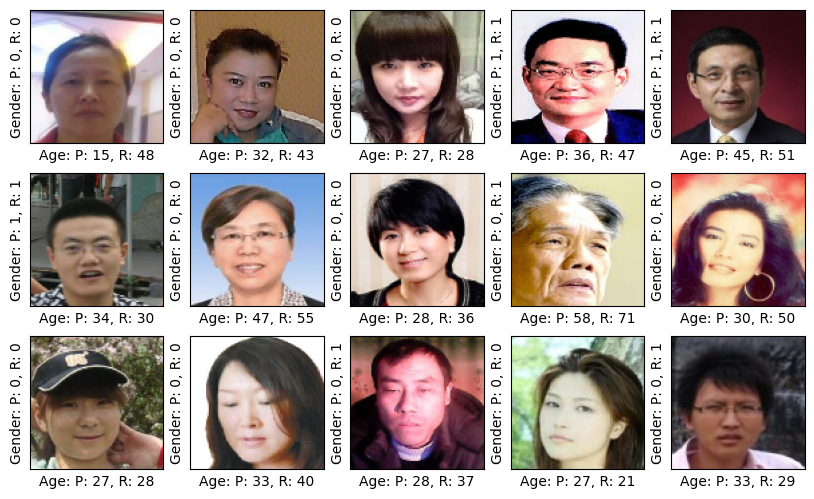

In [73]:
# Verificamos que todo esté correcto:
plt.figure(figsize=(10, 6))

paso = np.random.randint(0,6685-16)
paso = 0
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_val[i+paso])
    plt.xlabel(f'Age: P: {int(y_age_pred[i+paso])}, R: {y_age_raw_val[i+paso]}')
    plt.ylabel(f'Gender: P: {int(y_gender_pred[i+paso])}, R: {y_gender_val[i+paso]}')
plt.show()

In [63]:
error_edad=np.zeros(len(range(2,81)))
count_edad = np.zeros(len(range(2,81)))
x_error_edad = np.array(range(2,81))

for y_edad, predicho in zip(y_age_raw_val, y_age_pred):
    for i_edad, edad in enumerate(x_error_edad):
        if edad == y_edad:
            
            count_edad[i_edad]+=1 
            error_edad[i_edad] += abs(y_edad-float(predicho))
            

error_edad = error_edad / count_edad
            

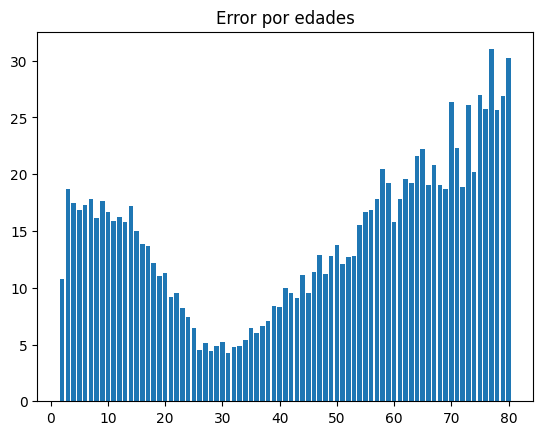

In [74]:
plt.bar(x_error_edad, error_edad)
plt.title('Error por edades')
plt.show()